In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
def CostFunction(t, y):
    
    cost = np.sum(0.5 * (t-y) ** 2)
    # cost = 0.5 * sum ((t-y) ** 2)
    return cost

# Funcion Sigmoide
def sigmoid(g):
    a = 1 / (1 + np.exp(-g))
    return(a)


err_vectorS  = []
w_fS = []

#%% Entradas
x = np.array([[2,6],[4,4],[6,3],[4,10],[7,10],[9,8]])

#%% Target sigmoide
tS = np.array([[1],[1],[1],[-1],[-1],[-1]])

#%% Vector de pesos para sigmoide
w_iS = np.array([[0.5],[-0.5],[-1]])

alpha = 0.4

#%% bias
bias =np.shape(x)[0]
bias = -1 * np.ones((bias,1))

#%% Vector aumentado
xS = np.concatenate([x,bias], axis = 1)


In [3]:
ticS = time.time()

# Dot product
a = np.dot(xS,w_iS)

#Funcion sigmoide
y = sigmoid(a)

#Error cuadratico medio
err = CostFunction(tS, y)
err_vectorS.append(err)
epochS = 0
epocas = 3000

In [4]:
#####Entrenamiento
for i in range(epocas):
    epochS+=1
    for i in range(np.shape(xS)[0]):
        # Dot product
        a = np.dot(xS[i] , w_iS)
        # Hard limit
        y[i] = sigmoid(a)
        # Actualizacion de pesos
        x_T = np.reshape(xS[i], (len(w_iS),1))#transpuesta
        w_nS = w_iS - alpha * x_T * y[i] * (y[i] - tS[i]) * (1 - y[i])
        w_iS = w_nS
        
    err = 0.25 * CostFunction(tS, y)
    
    err_vectorS.append(err)
    w_fS.append(w_iS)
    
tocS = time.time()

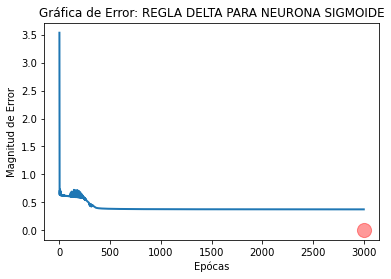

In [5]:
plt.figure(0)
plt.plot(err_vectorS, linewidth = 2)
plt.title('Gráfica de Error: REGLA DELTA PARA NEURONA SIGMOIDE')
plt.ylabel('Magnitud de Error')
plt.xlabel('Epócas')
plt.scatter(len(err_vectorS) - 1, 0, color = 'r', s = 200, marker = 'o', alpha = 0.4)
plt.show()

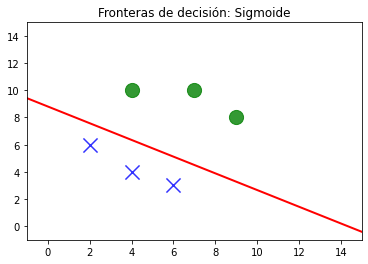

In [6]:
################%% Grafica frontera de decision
fig = plt.figure(1)
plt.xlim([-1.0,15.0])
plt.ylim([-1.0,15.0])

patterns = np.unique(tS)

for patt in patterns:
  pos = np.where(patt == tS)[0]
  if patt == -1:
    plt.scatter(x[pos,0],x[pos,1],color = 'g', s =200, marker = 'o', alpha = 0.8)
  else:
    plt.scatter(x[pos,0],x[pos,1], color= 'b', s =200, marker = 'x', alpha = 0.8)

x = np.linspace(-1,15)

yS = w_iS[2] / w_iS[1] - (x * w_iS[0]) / w_iS[1]

plt.plot(x,yS,'r', linewidth = 2)
plt.title('Fronteras de decisión: Sigmoide')
plt.show(fig)

In [8]:
print('')
print('Pesos finales: ')
for i in range(1):
    res = str(w_iS)
    print (res)
print('')

# Dot product
a = np.dot(xS,w_iS)

#Funcion sigmoide
y = sigmoid(a)

print('Sigmoide')
print('Meta:    Predicción:')
for i in range(len(y)):
    resS = str(tS[i]) + '--------' + str(y[i])
    print(resS)

print(f'\nTiempo requerido sigmoide: {tocS - ticS:.5f} ms.')
print(f'\nÉpocas requeridas: {epochS}.\n')


Pesos finales: 
[[ -1.04760182]
 [ -1.70487723]
 [-15.01514102]]

Sigmoide
Meta:    Predicción:
[1]--------[0.93647409]
[1]--------[0.98210584]
[1]--------[0.97378601]
[-1]--------[0.00197731]
[-1]--------[8.55055335e-05]
[-1]--------[0.00031827]

Tiempo requerido sigmoide: 0.64405 ms.

Épocas requeridas: 3000.



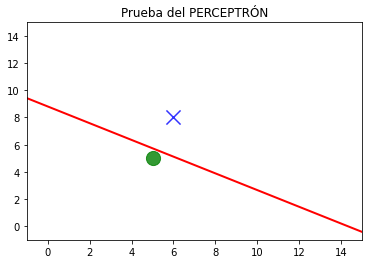

In [9]:
#Prueba
# Plotting Decision Boundaries
plt.xlim([-1.0, 15.0])
plt.ylim([-1.0, 15.0])


plt.scatter(5, 5, color = 'g', s = 200, marker = 'o', alpha = 0.8)
plt.scatter(6, 8, color = 'b', s = 200, marker = 'x', alpha = 0.8)

x1 = np.linspace(-1, 15)
x2 = w_iS[2] / w_iS[1] - (x1 * w_iS[0]) / w_iS[1]

plt.plot(x1, x2, 'red', linewidth = 2)
plt.title('Prueba del Sigmoide')
plt.show()